Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


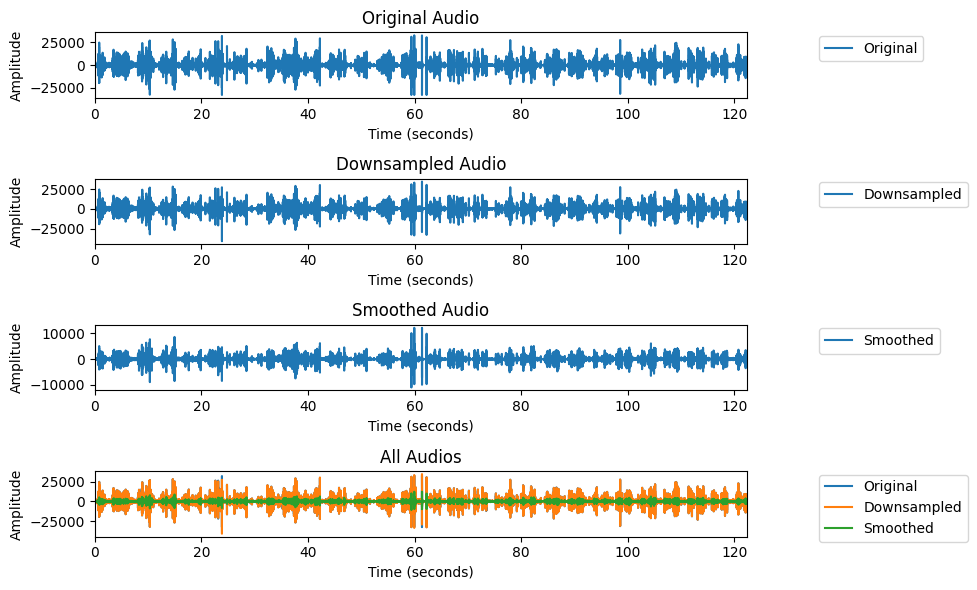

Number of points beyond threshold (Amplitude > 5000):
Original Audio: 99676
Downsampled Audio: 18103
Smoothed Audio: 214


In [2]:
#The code takes a .wav file and converts it to a .csv file format and saves it on a desired location
# on the google drive. It uses various python libraries
# This code also takes the original .wav file and downsample it to 8KHz before saving it as a .csv file
# The original data is smoothed and saved it as a .csv file
# The data is plotted to see if there is a significant loss of the audio signal by applything these techniques.

#Import the drive module from the google.colab package. Itprovides functions to interact with Google Drive from a Colab notebook.
#Mounts the Google Drive to the Colab environment at the specified directory
from google.colab import drive
drive.mount('/content/drive')

# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample, savgol_filter


# Load the WAV file from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Finger Data/sampleData1.wav'  # replace this with your file path
sample_rate, data = wavfile.read(file_path)  # Read the WAV file, getting the sample rate and data

# Calculate time axis for original audio
duration = len(data) / sample_rate  # Calculate the duration of the audio in seconds
time_axis_original = np.linspace(0, duration, len(data))  # Create a time axis for the original audio data

# Convert to DataFrame and save as CSV
df_original = pd.DataFrame({'Time (seconds)': time_axis_original, 'Amplitude': data})  # Create a DataFrame with time and amplitude
df_original.to_csv('/content/drive/MyDrive/Colab Notebooks/outputFile.csv', index=False)  # Save the DataFrame as a CSV file


# Downsample to 8000Hz
downsampled_data = resample(data, int(len(data) * (8000 / sample_rate)))  # Resample the data to 8000 Hz
duration_downsampled = len(downsampled_data) / 8000  # Calculate the duration of the downsampled audio
time_axis_downsampled = np.linspace(0, duration_downsampled, len(downsampled_data))  # Create a time axis for the downsampled data
df_downsampled = pd.DataFrame({'Time (seconds)': time_axis_downsampled, 'Amplitude': downsampled_data})  # Create a DataFrame with downsampled time and amplitude
df_downsampled.to_csv('/content/drive/MyDrive/Colab Notebooks/outputFile_downsampled.csv', index=False)  # Save the downsampled DataFrame as a CSV file

# Apply smoothing
smoothed_data = savgol_filter(downsampled_data, 51, 3)  # Apply Savitzky-Golay filter to smooth the data, with a window size of 51 and polynomial order 3
df_smoothed = pd.DataFrame({'Time (seconds)': time_axis_downsampled, 'Amplitude': smoothed_data})  # Create a DataFrame with smoothed time and amplitude
df_smoothed.to_csv('/content/drive/MyDrive/Colab Notebooks/outputFile_smoothed.csv', index=False)  # Save the smoothed DataFrame as a CSV file


# Plotting each graph separately
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot Original dataframe
plt.subplot(4, 1, 1)  # Create a subplot (4 rows, 1 column, 1st plot)
plt.plot(df_original['Time (seconds)'], df_original['Amplitude'], label='Original')  # Plot original data
plt.title('Original Audio')  # Set the title for the original audio plot
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('Amplitude')  # Label the y-axis
plt.xlim(0, duration)  # Set the x-axis limits to the duration of the audio
plt.legend(bbox_to_anchor=(1.1, 1.05))  # Add a legend, placing it outside the plot area

# Plot Downsampled
plt.subplot(4, 1, 2)  # Create a subplot (4 rows, 1 column, 2nd plot)
plt.plot(df_downsampled['Time (seconds)'], df_downsampled['Amplitude'], label='Downsampled')  # Plot downsampled data
plt.title('Downsampled Audio')  # Set the title for the downsampled audio plot
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('Amplitude')  # Label the y-axis
plt.xlim(0, duration_downsampled)  # Set the x-axis limits to the duration of the downsampled audio
plt.legend(bbox_to_anchor=(1.1, 1.05))  # Add a legend, placing it outside the plot area

# Plot Smoothed
plt.subplot(4, 1, 3)  # Create a subplot (4 rows, 1 column, 3rd plot)
plt.plot(df_smoothed['Time (seconds)'], df_smoothed['Amplitude'], label='Smoothed')  # Plot smoothed data
plt.title('Smoothed Audio')  # Set the title for the smoothed audio plot
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('Amplitude')  # Label the y-axis
plt.xlim(0, duration_downsampled)  # Set the x-axis limits to the duration of the downsampled audio
plt.legend(bbox_to_anchor=(1.1, 1.05))  # Add a legend, placing it outside the plot area

# Plotting all three graphs together
plt.subplot(4, 1, 4)  # Create a subplot (4 rows, 1 column, 4th plot)
plt.plot(df_original['Time (seconds)'], df_original['Amplitude'], label='Original')  # Plot original data
plt.plot(df_downsampled['Time (seconds)'], df_downsampled['Amplitude'], label='Downsampled')  # Plot downsampled data
plt.plot(df_smoothed['Time (seconds)'], df_smoothed['Amplitude'], label='Smoothed')  # Plot smoothed data
plt.title('All Audios')  # Set the title for the combined plot
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('Amplitude')  # Label the y-axis
plt.xlim(0, duration)  # Set the x-axis limits to the duration of the original audio
plt.legend(bbox_to_anchor=(1.1, 1.05))  # Add a legend, placing it outside the plot area

plt.tight_layout()  # Adjust subplots to fit into the figure area neatly
plt.show()  # Display the figure


# Set the threshold value
threshold = 5000

# Calculate number of points beyond threshold for original audio
points_beyond_threshold_original = df_original[df_original['Amplitude'] > threshold].shape[0]  # Filter the original DataFrame for amplitudes greater than the threshold and count the number of such points

# Calculate number of points beyond threshold for downsampled audio
points_beyond_threshold_downsampled = df_downsampled[df_downsampled['Amplitude'] > threshold].shape[0]  # Filter the downsampled DataFrame for amplitudes greater than the threshold and count the number of such points

# Calculate number of points beyond threshold for smoothed audio
points_beyond_threshold_smoothed = df_smoothed[df_smoothed['Amplitude'] > threshold].shape[0]  # Filter the smoothed DataFrame for amplitudes greater than the threshold and count the number of such points

# Print the results
print("Number of points beyond threshold (Amplitude > 5000):")  # Print a descriptive header
print("Original Audio:", points_beyond_threshold_original)  # Print the number of points beyond the threshold for the original audio
print("Downsampled Audio:", points_beyond_threshold_downsampled)  # Print the number of points beyond the threshold for the downsampled audio
print("Smoothed Audio:", points_beyond_threshold_smoothed)  # Print the number of points beyond the threshold for the smoothed audio






Original Audio:

The original audio graph represents the raw audio signal sampled at the original sample rate.
It may contain high-frequency components and noise, depending on the recording conditions and the source of the audio.

Downsampled Audio:
Downsampling is the process of reducing the sampling rate of a signal.
In this case, the original audio signal is downsampled to a lower sampling rate of 8000Hz from its original rate.
Downsampling reduces the number of samples in the signal while maintaining its essential characteristics.
The downsampled audio graph shows a similar shape to the original audio but with fewer data points, resulting in a coarser representation of the signal.

Smoothed Audio:
Downsmoothing, or simply smoothing, is a technique used to reduce high-frequency noise or sharp fluctuations in a signal.
In this example, we apply a Savitzky-Golay filter to smooth the downsampled audio signal.
The Savitzky-Golay filter is a type of linear filter that effectively removes high-frequency noise while preserving the shape of the signal.
The smoothed audio graph appears smoother compared to the downsampled audio, with reduced noise and sharper transitions.
In summary, downsampling reduces the sampling rate of a signal, while downsmoothing reduces high-frequency noise or sharp fluctuations in the signal. Both processes aim to simplify and enhance the representation of the audio signal for various applications such as data compression, analysis, or visualization.

Downsampling and smoothing audio signals are common signal processing techniques used to achieve different objectives. Here's an explanation of why these techniques might be used:

Downsampling
Reduce Data Size:

Storage Efficiency: Downsampling reduces the amount of data, making it more efficient to store and transmit.
Computational Efficiency: With fewer data points, subsequent processing (such as analysis or machine learning) can be performed more quickly.
Adapt to Lower Sampling Rates:

Compatibility: Some applications or devices may only support lower sampling rates.
Bandwidth Reduction: In contexts where bandwidth is limited (e.g., streaming over the internet), lower sampling rates can reduce the amount of data that needs to be transmitted.
Focus on Lower Frequency Components:

Eliminating High Frequencies: Downsampling can effectively filter out high-frequency noise that is not of interest, allowing focus on the lower frequency components of the signal which might be more relevant for certain analyses.
Smoothing
Noise Reduction:

Signal Clarity: Smoothing reduces random noise, making the signal clearer and more interpretable.
Improved Analysis: Cleaner signals can improve the accuracy of subsequent analyses, such as feature extraction or pattern recognition.
Highlighting Trends:

Trend Analysis: Smoothing can help highlight the underlying trends in the data by reducing the impact of short-term fluctuations.
Visual Clarity: For visualization purposes, smoothed data can make it easier to see and understand the main patterns and trends in the signal.
Preprocessing for Machine Learning:

Feature Extraction: Smoothing can be a preprocessing step to enhance features in the data that will be used for machine learning models.
Stability of Models: Models trained on smoothed data might perform better and be more stable, as they are less likely to overfit to noise.
Example Scenarios
Downsampling: If you are working with a high-frequency signal that contains more data than necessary for your analysis, you might downsample it to a lower rate that retains the important information while discarding redundant high-frequency content. This is common in audio processing where the human ear cannot discern frequencies above a certain threshold, so higher sampling rates provide no additional perceptual benefit.

Smoothing: In an experiment recording muscle electrical activity (EMG), the raw signal might contain high-frequency noise from various sources. Applying a smoothing filter can reduce this noise, making the signal more interpretable and the subsequent analysis (such as identifying muscle activation periods) more accurate.

By downsampling and smoothing, you can make your data more manageable and your analyses more reliable, especially when dealing with noisy or large datasets.





